In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn import datasets

In [3]:
df = pd.read_csv('http://rasmuskyng.com/am221_spring18/psets/hw7/banknotes.data',header=None)

In [4]:
df[4] = 2 * df[4] - 1

In [5]:
X = df.iloc[:,:4].copy()
y = df.iloc[:,4].copy()
target = y==-1

In [8]:
# a. 
def perceptron(X):
    
    w = [0.0 for i in range(X.shape[1])]
    separated = False
    while not separated:
        separated = True
        for x in X:
            if w @ x <= 0:
                w += x/LA.norm(x, 2)
                separated=False

    return w



In [7]:
# append -1 to the end of all rows
X = np.hstack([X,-np.ones((X.shape[0],1))])

# negate values in label 0
X[target] = -1 * X[target]

perceptron(X)

KeyboardInterrupt: 

In [18]:
# b.
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

X = df.iloc[:,:4].copy()
y = np.expand_dims(df.iloc[:,4].copy(),axis=-1)

n,d = X.shape
lambdas = [10.0**i for i in np.arange(-7,7,1)]

In [19]:
def svm(lam):
    Q = matrix(np.vstack([np.hstack([np.eye(d),np.zeros([d,1+n])]),np.zeros([1+n,d+1+n])]))
    p = matrix(np.vstack([np.zeros([d+1,1]),lam * np.ones([n,1])]))
    h = matrix(np.vstack([-1 * np.ones([n,1]),np.zeros([n,1])]))
    G = matrix(np.vstack([np.hstack([-1 * y * X, -1 * y, -1 * np.ones([n,n])]),np.hstack([np.zeros([n,d+1]),-1 * np.eye(n)])]))
    sol=solvers.qp(Q, p, G, h)
    
    w_opt = np.array(sol['x'])[:d]
    b = np.array(sol['x'])[d]
    print(w_opt,b)
    acc = np.mean((X @ w_opt + b > 0).astype(float) == (y > 0).astype(float))
    return acc

In [20]:
accuracies = []
for lam in lambdas:
    acc = svm(lam)
    accuracies.append(acc)
    print(lam,acc)

[[-1.41785668e-07]
 [-9.67115743e-08]
 [-1.44256608e-09]
 [-2.58630848e-08]] [0.00247209]
1e-07 0.4446064139941691
[[-2.10284556e-06]
 [-1.49763010e-06]
 [ 8.04650674e-09]
 [-3.66516826e-07]] [-5.37269245e-05]
1e-06 0.5553935860058309
[[-2.08191356e-05]
 [-1.59399467e-05]
 [ 3.04006799e-07]
 [-3.30831866e-06]] [7.80753715e-06]
1e-05 0.8199708454810496
[[-1.59860406e-04]
 [-7.91284584e-05]
 [-7.80980977e-05]
 [-2.41113444e-05]] [0.00015587]
0.0001 0.9744897959183674
[[-7.23137849e-05]
 [-3.92128040e-05]
 [-4.91365196e-05]
 [-1.03706336e-05]] [6.37986831e-05]
0.001 0.9868804664723032
[[-1.53722281e-06]
 [-8.49145771e-07]
 [-1.05692732e-06]
 [-2.47848983e-07]] [1.30160191e-06]
0.01 0.989067055393586
[[-2.66500609e-07]
 [-1.47351529e-07]
 [-1.83345021e-07]
 [-4.30082333e-08]] [2.25575696e-07]
0.1 0.989067055393586
[[-1.69436272e-07]
 [-9.42862741e-08]
 [-1.17054675e-07]
 [-2.74895366e-08]] [1.43071816e-07]
1.0 0.989067055393586
[[-5.86021598e-07]
 [-3.23489836e-07]
 [-4.02750005e-07]
 [-9.

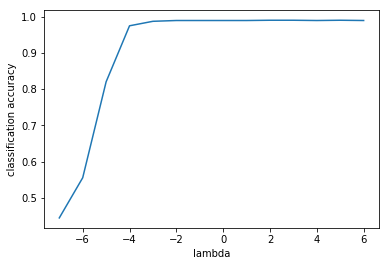

In [22]:
import matplotlib.pyplot as plt
plt.plot([i for i in np.arange(-7,7,1)],accuracies)
plt.xlabel('lambda')
plt.ylabel('classification accuracy')
plt.show()
